This Code Includes the Imported libraries and the downloaded etf data from january 2020 to now and saves it to a SQlite datbase that was created.

In [14]:
import yfinance as yf
import pandas as pd
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt

etfs = ['XLK', 'XLF', 'XLV', 'XLE']

start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

etf_data = {}
for ticker in etfs:
    print(f"Data {ticker}")
    df = yf.download(ticker, start=start_date, end=end_date)
    df.reset_index(inplace=True)
    df['ETF'] = ticker
    etf_data[ticker] = df

conn = sqlite3.connect("etf_data.db")

for ticker, df in etf_data.items():
    df.to_sql(ticker, conn, if_exists='replace', index=False)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data XLK
Data XLF
Data XLV
Data XLE


This section reads raw ETF data from the SQLite database, cleans and formats the date and column names, sorts the data, and saves a cleaned version for further analysis."

In [15]:
data = {}

for ticker in etfs:
    df = pd.read_sql(f"SELECT * FROM {ticker}", conn)
    df.columns = [col if isinstance(col, str) else col[0] for col in df.columns]

    if 'Date' not in df.columns:
        df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)

    data[ticker] = df
    df.to_sql(f"{ticker}_clean", conn, if_exists='replace', index=False)

    print(f"\n{ticker} - Clean Data")
    display(df.head())


XLK - Clean Data


,Date,"('Close', 'XLK')","('High', 'XLK')","('Low', 'XLK')","('Open', 'XLK')","('Volume', 'XLK')","('ETF', '')"
0,2020-01-02,89.094650,89.094650,88.073864,88.245585,13283500,XLK
1,2020-01-03,88.092934,88.703504,87.787652,87.797194,15011800,XLK
2,2020-01-06,88.302803,88.398209,87.053057,87.215237,7815000,XLK
3,2020-01-07,88.264648,88.703498,88.131088,88.455454,7681800,XLK
4,2020-01-08,89.209099,89.600237,88.197848,88.360034,11627200,XLK



XLF - Clean Data


,Date,"('Close', 'XLF')","('High', 'XLF')","('Low', 'XLF')","('Open', 'XLF')","('Volume', 'XLF')","('ETF', '')"
0,2020-01-02,28.069832,28.069832,27.816950,27.898233,28843300,XLF
1,2020-01-03,27.771801,27.889209,27.627297,27.708581,51363600,XLF
2,2020-01-06,27.753733,27.771796,27.509882,27.518914,27956100,XLF
3,2020-01-07,27.573101,27.735666,27.573101,27.690509,39627500,XLF
4,2020-01-08,27.753733,27.907268,27.600197,27.600197,47966600,XLF



XLV - Clean Data


,Date,"('Close', 'XLV')","('High', 'XLV')","('Low', 'XLV')","('Open', 'XLV')","('Volume', 'XLV')","('ETF', '')"
0,2020-01-02,93.952316,94.099508,93.280772,93.989114,6277400,XLV
1,2020-01-03,93.133583,93.667143,92.406839,92.866803,8247500,XLV
2,2020-01-06,93.713127,93.740724,92.682805,92.710401,6441800,XLV
3,2020-01-07,93.529152,93.611949,93.004793,93.455556,6335300,XLV
4,2020-01-08,94.136292,94.559458,93.538337,93.575135,7494700,XLV



XLE - Clean Data


,Date,"('Close', 'XLE')","('High', 'XLE')","('Low', 'XLE')","('Open', 'XLE')","('Volume', 'XLE')","('ETF', '')"
0,2020-01-02,48.211849,48.283472,47.933304,48.100429,11944700,XLE
1,2020-01-03,48.068596,48.792808,47.829842,48.649557,29502900,XLE
2,2020-01-06,48.442642,48.689353,48.068601,48.235726,22458100,XLE
3,2020-01-07,48.315311,48.363063,47.750267,48.307354,11462500,XLE
4,2020-01-08,47.519470,48.323268,47.455805,48.267560,19021400,XLE


This section performs aggregation and statistical analysis by calculating the overall return percentage and yearly growth (CAGR) for each sector ETF using the start and end prices from 2020 to today.

In [ ]:
summary = []

start_year = 2020
today = datetime.today()
years_elapsed = today.year + today.timetuple().tm_yday / 365 - start_year

for ticker, df in data.items():
    close_col = [col for col in df.columns if 'Close' in col][0]

    start_price = df[close_col].iloc[0]
    end_price = df[close_col].iloc[-1]

    total_return = (end_price - start_price) / start_price
    cagr = ((end_price / start_price) ** (1 / years_elapsed)) - 1

    summary.append({
        'ETF': ticker,
        'Start Price': round(start_price, 2),
        'End Price': round(end_price, 2),
        'Overall Return (%)': round(total_return * 100, 2),
        'Yearly Growth (CAGR %)': round(cagr * 100, 2)
    })

performance_df = pd.DataFrame(summary)
performance_df

,ETF,Start Price,End Price,Overall Return (%),Yearly Growth (CAGR %)
0,XLK,89.09,234.89,163.64,19.75
1,XLF,28.07,51.59,83.79,11.98
2,XLV,93.95,133.09,41.66,6.69
3,XLE,48.21,85.48,77.30,11.24


This section visualizes the overall return percentage of each ETF sector using a bar chart. The CAGR label above each bar shows the yearly growth since 2020, helping compare sector performance at a glance.

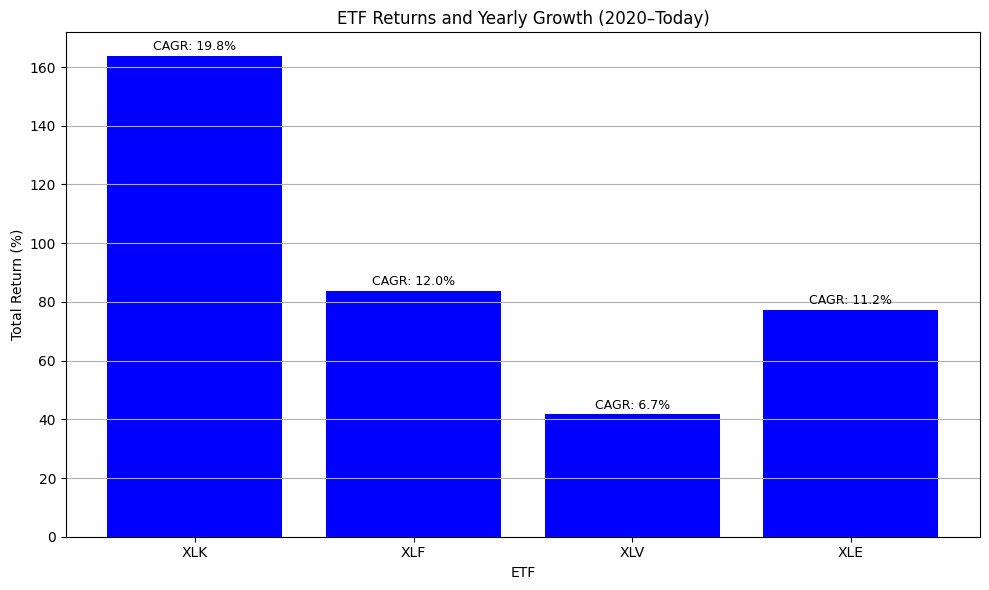

In [16]:
plt.figure(figsize=(10, 6))
bars = plt.bar(performance_df['ETF'], performance_df['Overall Return (%)'], color='blue')

for i, bar in enumerate(bars):
    cagr = performance_df['Yearly Growth (CAGR %)'][i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,f'CAGR: {cagr:.1f}%', ha='center', fontsize=9)

plt.title("ETF Returns and Yearly Growth (2020–Today)")
plt.xlabel("ETF")
plt.ylabel("Total Return (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**CONCLUSION**

Technology (XLK) outperformed all sectors with the highest total return (163%) and strongest yearly growth (~19.8% CAGR)

Financials (XLF) and Energy (XLE) showed strong growth with steady yearly gains around 11–12%

Healthcare (XLV) had the lowest growth, with just 6.7% CAGR, showing slower, more stable performance